# **Rayan International AI Contest**

<font color='black' style='font-family: "Times New Roman", Times, serif; font-size: 24px;'><strong>Machine Learning & Deep Learning Course </strong></font>

<font color='black' style='font-family: "Times New Roman", Times, serif; font-size: 20px;'><em>**Homework 1** || **Title**: Introduction to Machine Learning</em></font>


# Credit Card Fraud Detection

This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.



## Importing Libraries


In [80]:
!pip install scikit-plot

In [79]:
pip install scipy==1.11.4

In [75]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
import scikitplot as skplt
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.cluster import KMeans
import cv2

## Load Dataset

In [76]:
# Dataset Link: https://www.kaggle.com/datasets/mojtabanafez/rayan-homework1/data
!kaggle datasets download -d mojtabanafez/rayan-homework1

Dataset URL: https://www.kaggle.com/datasets/mojtabanafez/rayan-homework1
License(s): apache-2.0
rayan-homework1.zip: Skipping, found more recently modified local copy (use --force to force download)


In [77]:
!unzip ./rayan-homework1.zip

Archive:  ./rayan-homework1.zip
replace creditcard.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [81]:
df = pd.read_csv('./creditcard.csv')
df.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
# Separate features and target variable
X = df.drop('Class', axis=1)
y = df['Class']
X.shape, y.shape

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
import warnings
warnings.filterwarnings('ignore')

## Exploratory Data Analysis (EDA)



**Student Task:**
1. Check Summary Statistics for the Dataset
2. Visualize Distribution of Classes
3. Check Correlation Matrix
4. Plot the Distribution of Some Selected Features
5. Additional Analysis (Choose at Least 5)
    * Example: Data Visualization (After Dimension Reduction), Outlier Detection, Feature Engineering, Insightful Plots, ...

In [ ]:
# ### 2.1 Summary Statistics
#  summary statistics for the dataset
df.describe(include='all')

In [ ]:
# ### 2.2 Class Distribution
# Visualize the class distribution
sns.countplot(x='Class', data=df)
plt.title('Class Distribution')
plt.xlabel('Target Variable')
plt.ylabel('Count')
plt.show()

In [ ]:
# Display the class distribution in percentages
class_distribution = df['Class'].value_counts(normalize=True) * 100
class_distribution = class_distribution.rename('proportion')
print('Class Distribution:')
print(class_distribution)

In [ ]:
# ### 2.3 Correlation Matrix
# Compute the correlation matrix
corr_matrix = df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', linewidths=0.5, linecolor='white')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
# ### 2.4 Feature Distributions
# Plot the distribution of a few selected features
selected_features = ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'Amount', 'Class']

# Plot the distribution of the selected features
for feature in selected_features:
  plt.figure(figsize=(8, 6))
  sns.histplot(df[feature], kde=True)
  plt.title(f'Distribution of {feature}')
  plt.xlabel(feature)
  plt.ylabel('Count')
  plt.show()


In [ ]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA with 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Create a new DataFrame with the PCA components
df_pca = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
df_pca['class'] = y

# Visualize the data in the PCA space using Matplotlib
plt.figure(figsize=(10, 8))

# Visualize the data in the PCA space
plt.scatter(df_pca[df_pca['class'] == 0]['PC1'], df_pca[df_pca['class'] == 0]['PC2'], label='Class 0', color='blue')
plt.scatter(df_pca[df_pca['class'] == 1]['PC1'], df_pca[df_pca['class'] == 1]['PC2'], label='Class 1', color='orange')

# Create a legend
plt.legend(title='Class')

plt.title('Data Visualization after PCA')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd

# Select three features for 3D scatter plot
features_to_plot = ['V1', 'V2', 'V3']

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(df[features_to_plot[0]], df[features_to_plot[1]], df[features_to_plot[2]], c=df['Class'], cmap='viridis')

# Add labels
ax.set_xlabel(features_to_plot[0])
ax.set_ylabel(features_to_plot[1])
ax.set_zlabel(features_to_plot[2])
ax.set_title('3D Scatter Plot of Features')

# Add a colorbar
plt.colorbar(scatter, label='Class')
plt.show()


## Student Question

1. Describe at least two major challenges in the dataset based on your EDA findings.

  **Student Answer:**

  Imbalanced classes: Where one class has significantly fewer instances, leading to biased models.
  
  Outliers: Data points significantly different from others, which can distort model training and results.
  ******************************************************
2. Analyze the correlation matrix of the features.

  Time and V1 have a correlation of 0.117396, indicating a weak positive correlation.
  V1 and V2 have a correlation of 4.135835e-16, indicating virtually no correlation.
  V3 and V2 have a correlation of 3.243764e-16, also indicating no correlation.
  Amount and V5 have a correlation of -0.386356, indicating a moderate negative correlation.
  Class has various correlations with other variables, with notable values like -0.101347 with V1, 0.091289 with V2, and 0.133447 with V4.
  ******************************************************
3. Is your data linearly separable? Please provide a rationale.

  **Student Answer:**  Based on the nature of credit card fraud and the high dimensionality of the data, it's unlikely that the data is linearly separable. Fraudulent transactions can have complex patterns and might not be easily separated from non-fraudulent ones using a linear decision boundary

## Data Preprocessing

Based on the challenges you've identified, recommend preprocessing methods to use during training to enhance model performance.

Some popular preprocessing techniques you can search about and learn include:

* Data Cleaning (Outlier Detection and Treatment, Handling Missing Values, ...)
* Data Transformation (Normalization, Standardization, ...)
* Feature Engineering (Feature Creation, Feature Selection, ...)
* Data Reduction (Dimensionality Reduction, Sampling, ...)
* Resampling Techniques (Oversampling or Undersampling)
* Handling Imbalanced Data
* ...


* Data Cleaning (Outlier Detection and Treatment, Handling Missing Values, ...)

In [ ]:
# Calculate the sum of null values for each column
print(df.isnull().sum())

* Data Transformation (Normalization, Standardization, ...)

In [ ]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler object
scaler = StandardScaler()

# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data
X_test_scaled = scaler.transform(X_test)

* Data Reduction (Dimensionality Reduction, Sampling, ...)
* Resampling Techniques (Oversampling or Undersampling)
* Handling Imbalanced Data

In [ ]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE with higher intensity
smote = SMOTE(random_state=42, k_neighbors=2, sampling_strategy=0.5)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Sample data for better visualization
sample_size = 1000
X_train_sample = X_train.sample(n=sample_size, random_state=42)
X_train_resampled_sample = X_train_resampled.sample(n=sample_size, random_state=42)

# Plot the data
plt.figure(figsize=(8, 6))

# Plot original samples in blue
plt.scatter(X_train_sample.iloc[:, 0], X_train_sample.iloc[:, 1],
            label='Original Data', alpha=0.5, s=10, c='blue')

# Plot oversampled samples in red
plt.scatter(X_train_resampled_sample.iloc[:, 0], X_train_resampled_sample.iloc[:, 1],
            label='Resampled Data', alpha=0.5, s=10, marker='x', c='red')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.title('Data before and after SMOTE')
plt.show()


## Training

1. Train your model on the preprocessed and unpreprocessed training data.
2. Report followning evaluaiton metrics: Accuracy, Accuracy, Recall, Precision, Confusion Matrix
3. Evaluation your best model using K-Fold Cross Validation
3. Crucial Step: Enhance Your Model's Performance

**Please note:** The results in our cell output represent the minimum achievable. Try to surpass these results and analyze multiple ideas and attempts.








### Logistic Regression

In [ ]:
# Initialize the model
model = LogisticRegression()

# Use the full resampled data for training
model.fit(X_train_resampled, y_train_resampled)

# Make predictions using the scaled test data
y_pred = model.predict(X_test_scaled)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix with a blue and white colormap
plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix for Logistic Regression')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

# Print the classification report
report = classification_report(y_test, y_pred)
print('Logistic Regression Classification Report:\n', report)


SVM

* [SVM practical example](https://www.analyticsvidhya.com/blog/2021/10/support-vector-machinessvm-a-complete-guide-for-beginners/)

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize the Linear SVM model
svm_model = LinearSVC()

# Train the model using the scaled training data
svm_model.fit(X_train_resampled, y_train_resampled)

# Make predictions using the scaled test data
y_pred_svm = svm_model.predict(X_test_scaled)

# Compute the confusion matrix
cm_svm = confusion_matrix(y_test, y_pred_svm)

In [ ]:
# Compute the confusion matrix
cm_svm = confusion_matrix(y_test, y_pred_svm)

# Plot the confusion matrix with a blue and white colormap
plt.figure(figsize=(8, 8))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix for SVM')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

# Print the classification report
report_svm = classification_report(y_test, y_pred_svm)
print('SVM Classification Report:\n', report_svm)

## Student Questions

1. Compare the SVM vs Logistic Regression model? Generally which one was better?
Logistic Regression: Performs better overall, particularly for the minority class (class 1). It has higher precision and F1-score for class 1, making it a better choice for situations where false positives are costly.

  SVM: While it has a higher recall for the minority class (class 1), its very low precision results in a poor F1-score. This indicates that SVM is identifying more true positives but at the cost of many false positives.

  Generally, Logistic Regression is the better model in this case because it provides a better balance of precision and recall for both classes, particularly the minority class. This balance is crucial for models dealing with imbalanced datasets, where the minority class is of particular interest.
******************************************************
2. Is accuracy a suitable metric for evaluating performance in this problem? Explain your rationale.
  Accuracy is not suitable for evaluating performance in this problem due to the significant class imbalance (85,307 instances of class 0 vs. 136 instances of class 1). In such cases, accuracy can be misleading as it may be dominated by the majority class.

  Better Metrics:
  Precision: Indicates the correctness of positive predictions. Important for reducing false positives.
  Recall (Sensitivity): Indicates the model's ability to identify actual positives. Important for detecting minority class instances.
  F1-Score: The harmonic mean of precision and recall, providing a balanced measure, especially useful for imbalanced datasets.
  These metrics provide a more comprehensive evaluation of the model's performance on the minority class, which is crucial in imbalanced datasets.
******************************************************
3. If achieving high recall is crucial for our problem, what recommendations do you have to enhance this metric specifically for this dataset?

  **Student Answer:**  

  To enhance recall for this dataset:
  Oversample the Minority Class: Use techniques like SMOTE.
  Undersample the Majority Class: Reduce the number of majority class instances.
  Adjust Class Weights: Assign higher weights to the minority class.
  Tune Decision Threshold: Lower the threshold for predicting positive cases.
  Try Different Models: Use models like Random Forest or Gradient Boosting.
  These strategies can help improve recall for the minority class.

# Unsupervised Image Segmentation using Clustering!

Image segmentation is a crucial step in image processing and is essential for analyzing image contents. For instance, to determine if an indoor image contains a chair or a person, image segmentation can be used to isolate and examine each object individually. It typically precedes tasks like pattern recognition, feature extraction, and image compression.

Image segmentation involves classifying an image into various groups. Extensive research has been conducted in this field, particularly using clustering techniques. Among these, the K-Means clustering algorithm is one of the most widely used methods.

The process of image segmentation transforms an image into a set of pixel regions, represented by a mask or a labeled image. This segmentation allows for the targeted processing of significant image segments rather than the entire image.

In this section we want to demonstrate K-Mean able to cluster similar pixel properly. and finaly segment components of an image!

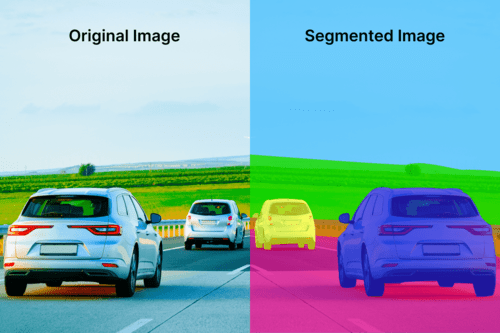

## Load Data

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Image Link (You can download and upload it): https://drive.google.com/file/d/16iMaYEGH-GgmqZfrCTw2vjYayllcgFcb/view?usp=sharing
!gdown 16iMaYEGH-GgmqZfrCTw2vjYayllcgFcb

In [ ]:
im =  cv2.imread('./elephant.jpg') # Reads an image into BGR Format
im = cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
original_shape = im.shape
print(im.shape)

In [ ]:
plt.imshow(im) # as RGB Format
plt.show()

In [ ]:
# Flatten Each channel of the Image
all_pixels  = im.reshape((-1,3))
print(all_pixels.shape)

## Number of Dominant Colors in Image

The optimal number of clusters when clustering all pixels represents the predominant colors in an image.








In [ ]:
# Elbow Method or # Silhouette Score
from sklearn.cluster import KMeans

# Elbow Method to determine the optimal number of clusters
def elbow_method(data):
    inertia = []
    k_range = range(1, 11)  # Try different numbers of clusters
    for k in k_range:
        kmeans = KMeans(n_clusters=k, random_state=0).fit(data)
        inertia.append(kmeans.inertia_)

    plt.figure(figsize=(8, 6))
    plt.plot(k_range, inertia, marker='o')
    plt.xlabel('Number of clusters')
    plt.ylabel('Inertia')
    plt.title('Elbow Method')
    plt.show()

elbow_method(all_pixels)

## Visualize Dominant Color

In [ ]:
# Apply K-Means with the chosen number of clusters
n_clusters = 5  # Choose the optimal number of clusters based on previous analysis
kmeans = KMeans(n_clusters=n_clusters, random_state=0)

# Fit the K-Means model to the data
kmeans.fit(all_pixels)

# Determine the dominant colors (cluster centers)
dominant_colors = kmeans.cluster_centers_
print("Dominant Colors (RGB):")
print(dominant_colors)

# Predict the cluster for each pixel
labels = kmeans.labels_

# Reshape the labels to the original image shape
segmented_img = labels.reshape(original_shape[:2])

# Display the segmented image
plt.figure(figsize=(8, 7))
plt.imshow(segmented_img, cmap='cividis')
plt.title('Segmented Image')
plt.axis('off')
plt.show()

# Optionally, display the dominant colors
plt.figure(figsize=(8, 2))
for i, color in enumerate(dominant_colors):
    plt.fill_between([i, i+1], 0, 1, color=color/255.0)
plt.xlim(0, n_clusters)
plt.yticks([])
plt.title('Dominant Colors')
plt.show()


In [ ]:
kmeans.fit(all_pixels)

In [ ]:
# Function to create and plot solid color images
def plot_dominant_colors(dominant_colors):
    num_colors = len(dominant_colors)
    fig, axes = plt.subplots(1, num_colors, figsize=(num_colors * 2, 2))

    for ax, color in zip(axes, dominant_colors):
        # Create an image where all pixels have the same color
        solid_color_image = np.ones((100, 100, 3)) * (color / 255.0)
        ax.imshow(solid_color_image)
        ax.axis('off')

    plt.title('Dominant Colors')
    plt.show()

# Plot each dominant color as a solid image
plot_dominant_colors(dominant_colors)

## Segmenting original image

In [ ]:
new_img = np.zeros((330*500,3),dtype='uint8')
print(new_img.shape)

In [ ]:
colors = kmeans.cluster_centers_
lables = kmeans.labels_

# Iterate over the image
for ix in range(new_img.shape[0]):
    new_img[ix] = colors[lables[ix]]

new_img = new_img.reshape((original_shape))
plt.imshow(new_img)
plt.show()